In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

import pandas as pd
from pydataset import data
from sklearn.cluster import KMeans

In [41]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1yqPkKQfX7_mr75MJrGTWNImCX1io1M0foANjxR6R0SE/edit#gid=948224145'    

csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

df_googlesheet = pd.read_csv(csv_export_url,header=None)
df = df_googlesheet

In [43]:
df.columns=['female_age','male_age', 'id', 'nonsence']
df

,female_age,male_age,id,nonsence
0,24,25,3iwivb,I'm [25/M] having issues with my GF [24/F] Facebook profile
1,18,20,3iwrcd,I [20M] asked a friend [18F] to the movies. Did I ask her out on a date?
2,17,16,3iwucq,Me (16/M) not sure if co-worker (17/F) is being flirtatious or is she just being friendly
3,17,16,3iwx0l,Me [16/M] Not sure if my co-worker [17/F] is being very flirtatious or just friendly
4,26,22,3iwx5t,Me [22/M] and my GF [26/F] having been seeing each other for a few months. Got some Qu...
5,35,42,3iwxnf,Is my wife [35/F] controlling or is it me [42/M]?
6,24,26,3ix465,"Me [24f] with my GF [26m] of 2 years, how can i marry with that type of person"
7,26,25,3ix4op,Am I (26/f)overreacting over his actions (25/m)?! He just left me here!
8,22,38,3ix5vg,She [22/f] didn't tell me she was in a long-distance relationship when we [38/m] were ...
9,30,30,3ixdul,[30/m] Girlfriend [30/f] Went to Concert Without Inviting Me


In [44]:
X = df[['female_age','male_age']]

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

print(kmeans.cluster_centers_)

centers = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centers

[[  20.43534892   21.29535076]
 [5000.           21.        ]
 [  28.44037559   30.77867203]]


,female_age,male_age
0,20.435349,21.295351
1,5000.000000,21.000000
2,28.440376,30.778672


Text(0, 0.5, 'inertia')

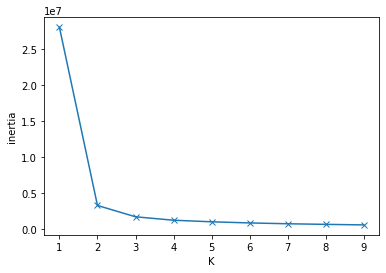

In [45]:
%matplotlib inline
subset = df[['female_age','male_age']]

k_values = []
inertias = []

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k).fit(subset)
    inertias.append(kmeans.inertia_)
    k_values.append(k)

plt.plot(k_values, inertias, marker='x')
plt.xlabel('K')
plt.ylabel('inertia')

[[  24.94648048   26.56281146]
 [5000.           21.        ]
 [  32.98245234   36.40857886]
 [  19.35901771   20.03415191]]


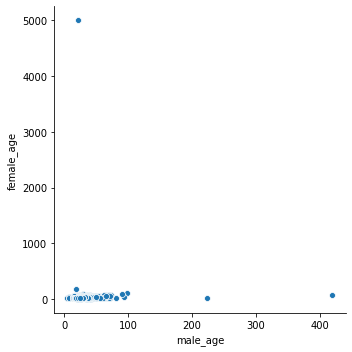

In [47]:
X = df[['female_age','male_age']]

kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

print(kmeans.cluster_centers_)

centers = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centers

sns.relplot(data=df, y='female_age', x='male_age')